# Credit cards

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import openml


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

from kneed import KneeLocator

## Loading the dataset

In [2]:
market_segment_data=openml.datasets.get_dataset(43618)
#credit_fraud_data=openml.datasets.get_dataset(44235)

print(f"This is dataset '{market_segment_data.name}")

X, y, categorical_indicator, attribute_names = market_segment_data.get_data(target=None, dataset_format="dataframe")
X.dropna(inplace=True)

print(X.info())
print(market_segment_data.description)

This is dataset 'Credit-Card-Dataset-for-Clustering
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   uint8  
 11  PURCHASES_TRX    

## Visualising and exploring the dataset

In [62]:
X.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


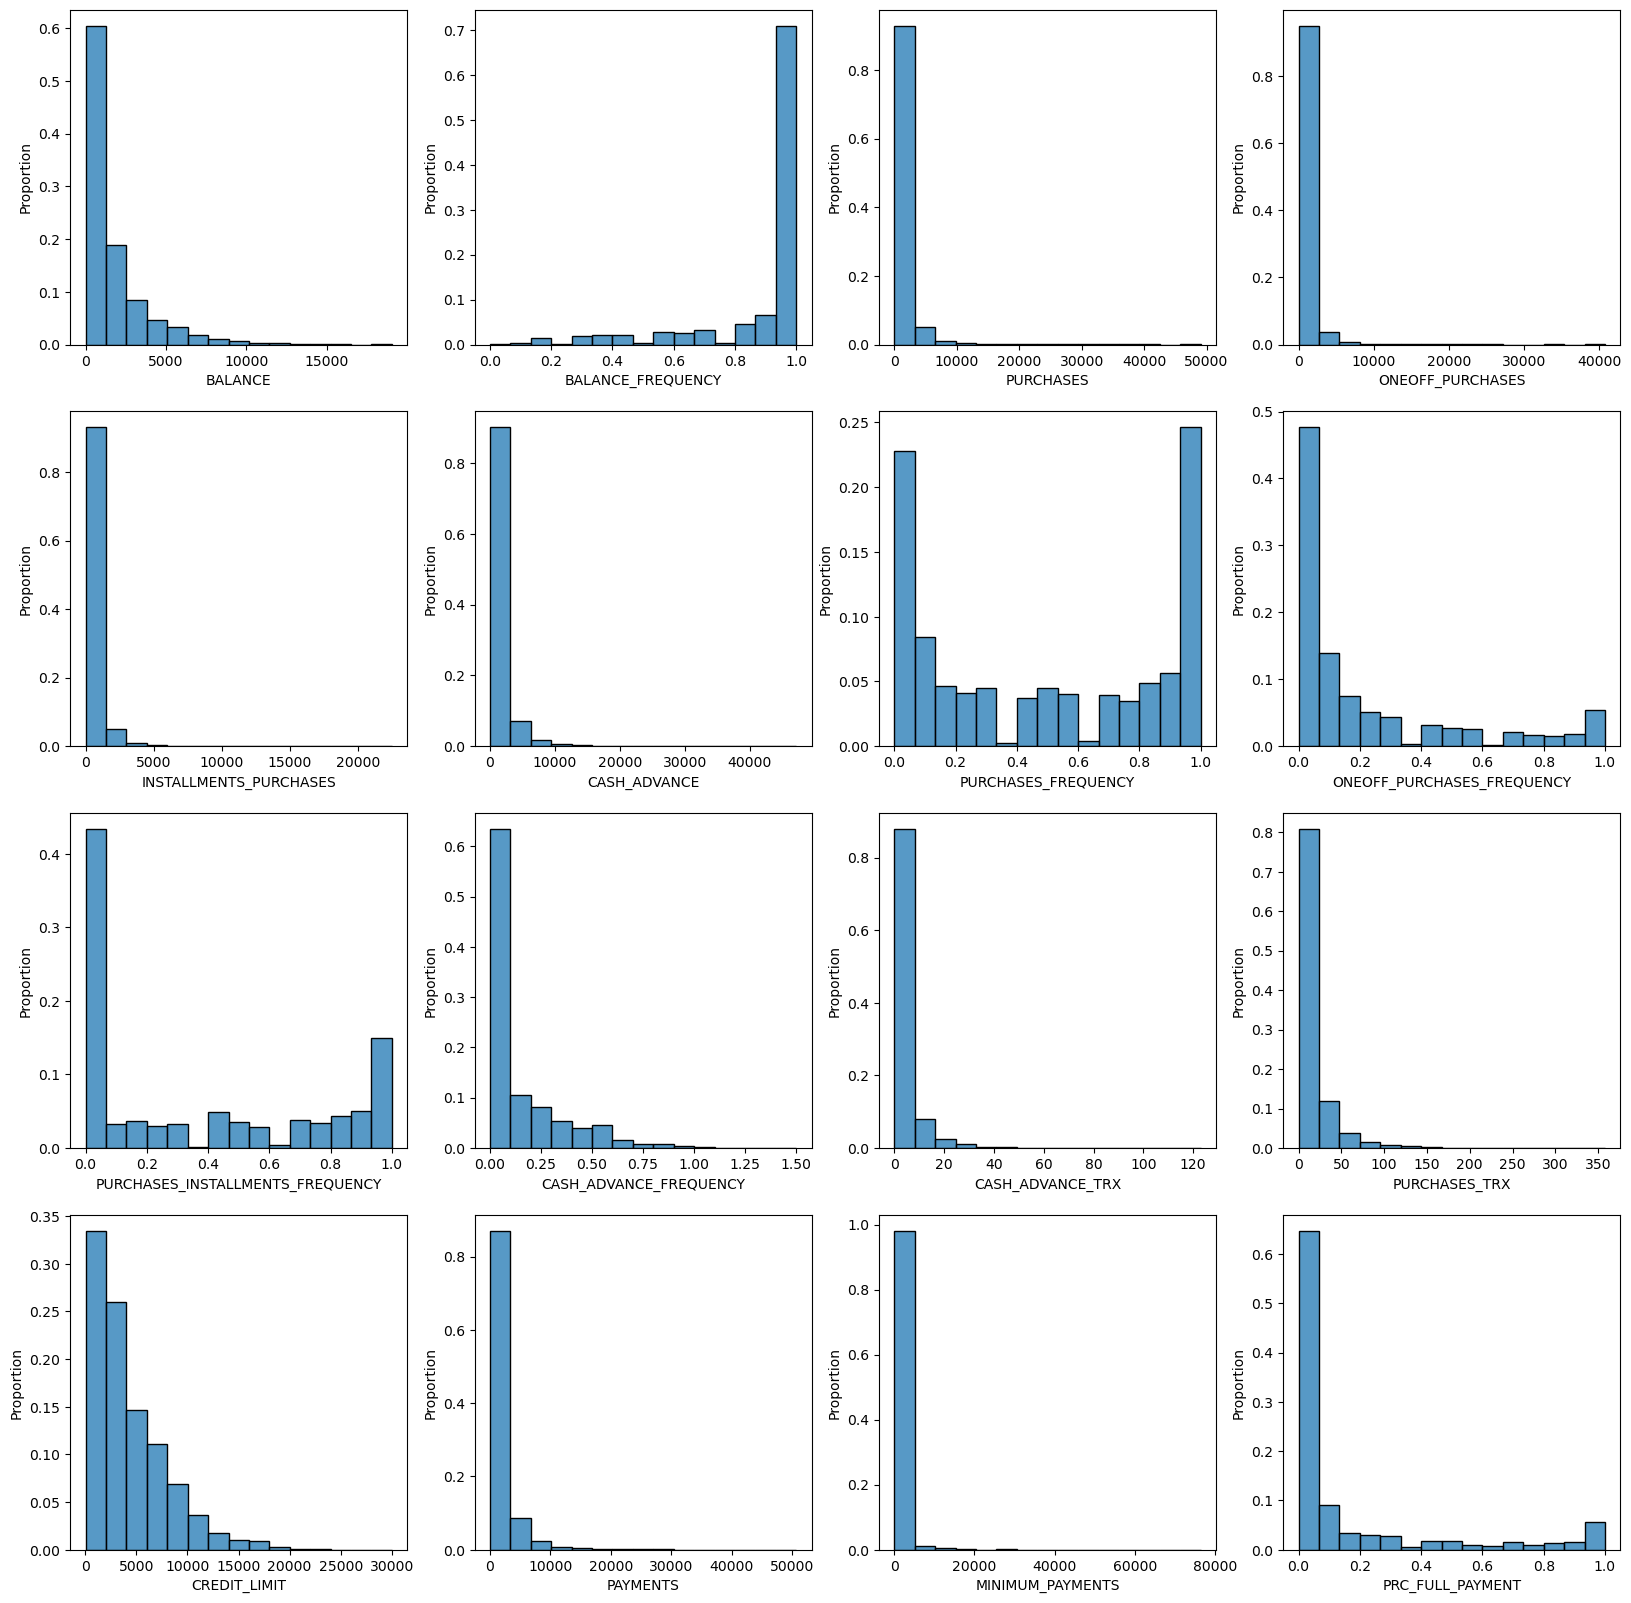

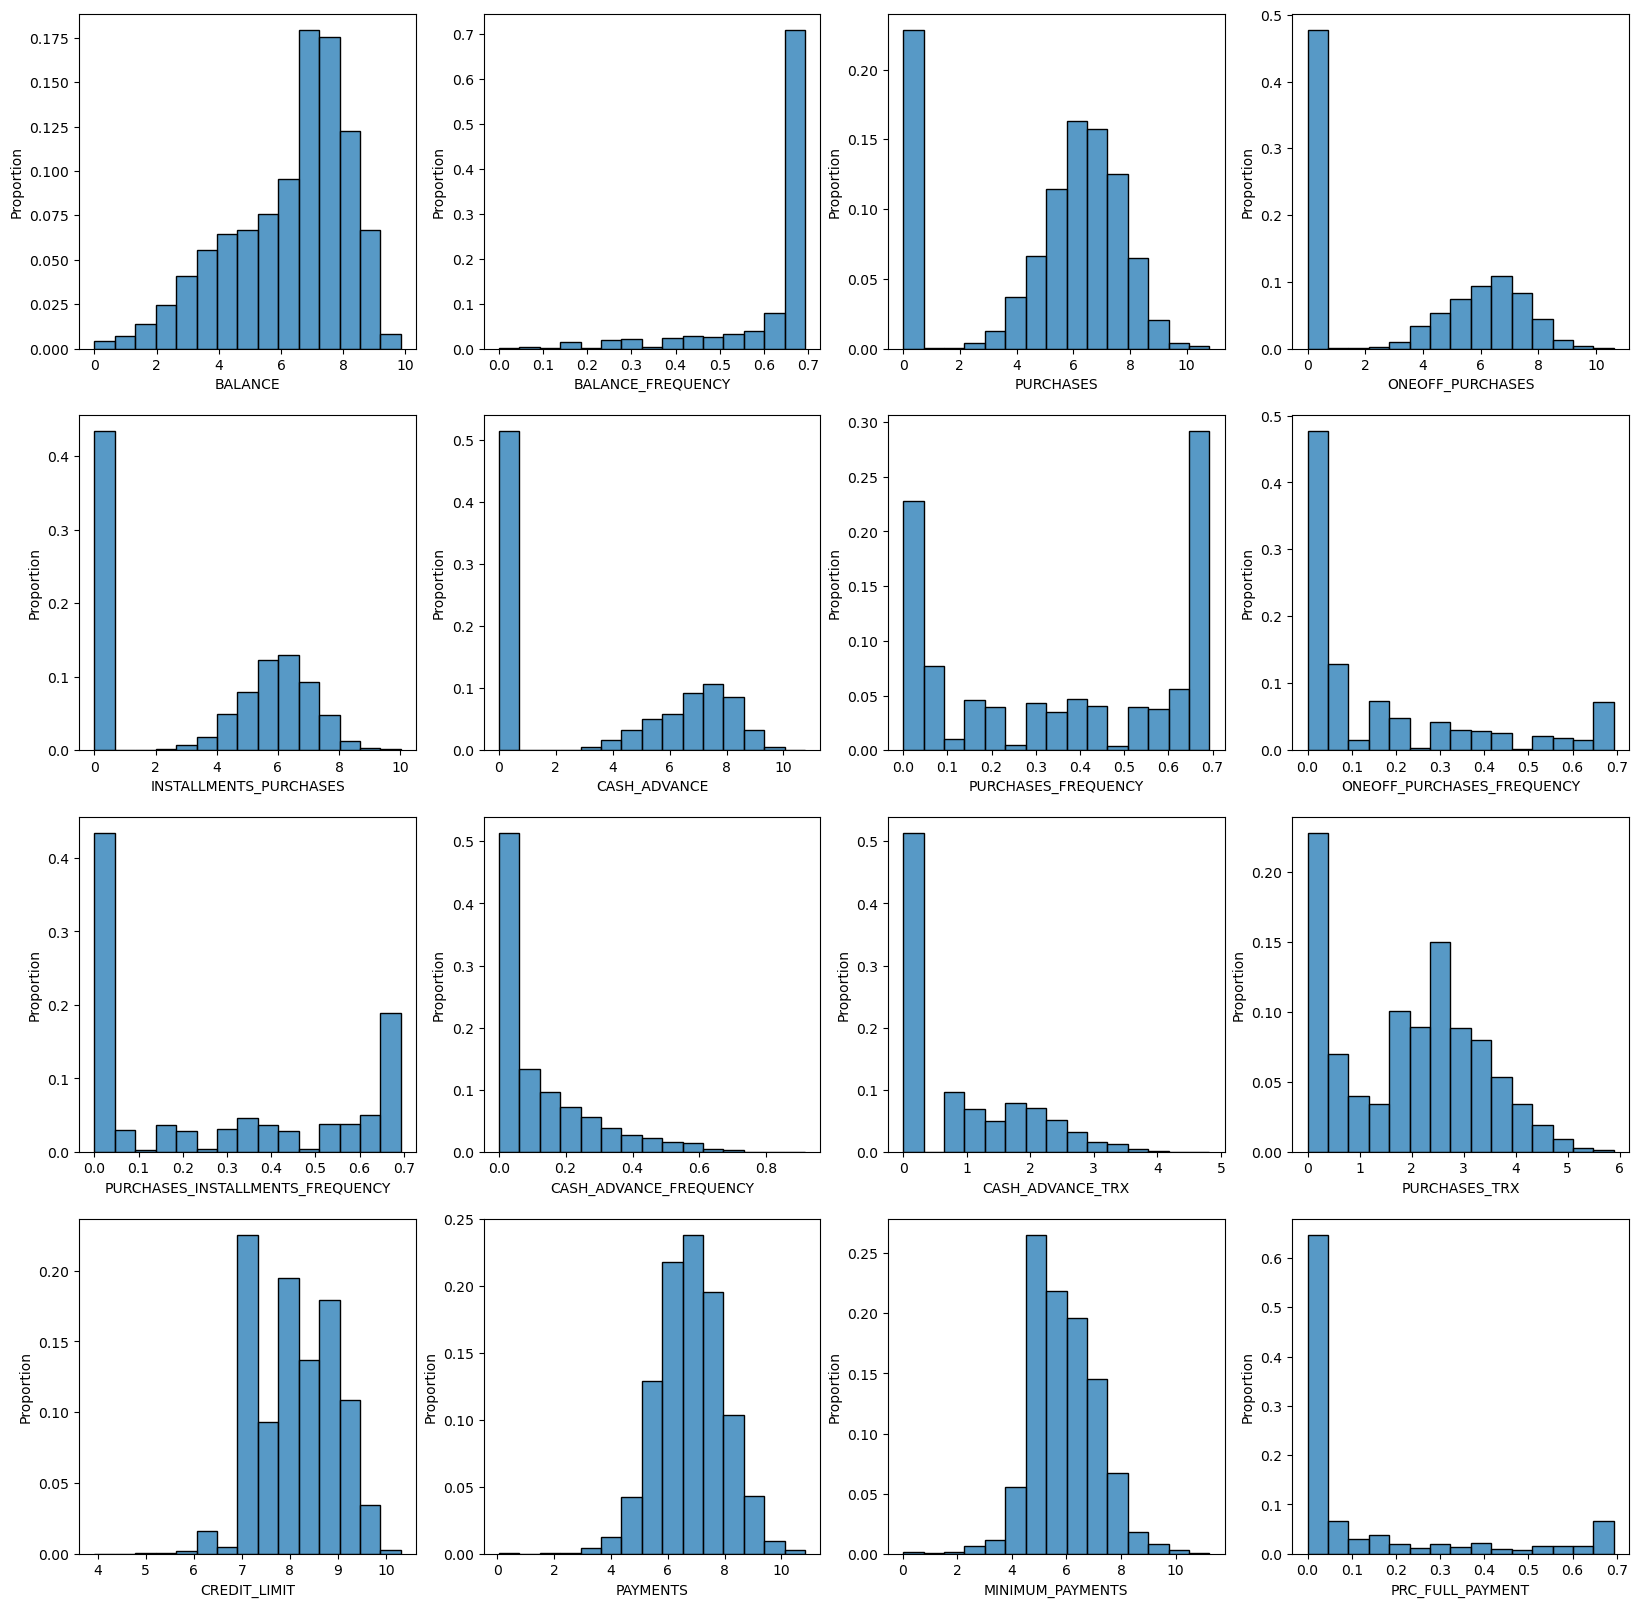

In [3]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for i in range(4):
    for j in range(4):
        sn.histplot(X[X.columns[4 * i + j]],stat='proportion',bins=15, ax=axs[i,j])
plt.show()

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
for i in range(4):
    for j in range(4):
        sn.histplot(np.log(X[X.columns[4 * i + j]]+1),stat='proportion',bins=15, ax=axs[i,j])
plt.show()
#for attribute in attribute_names:
#    sn.histplot(X[attribute])
#    plt.show()

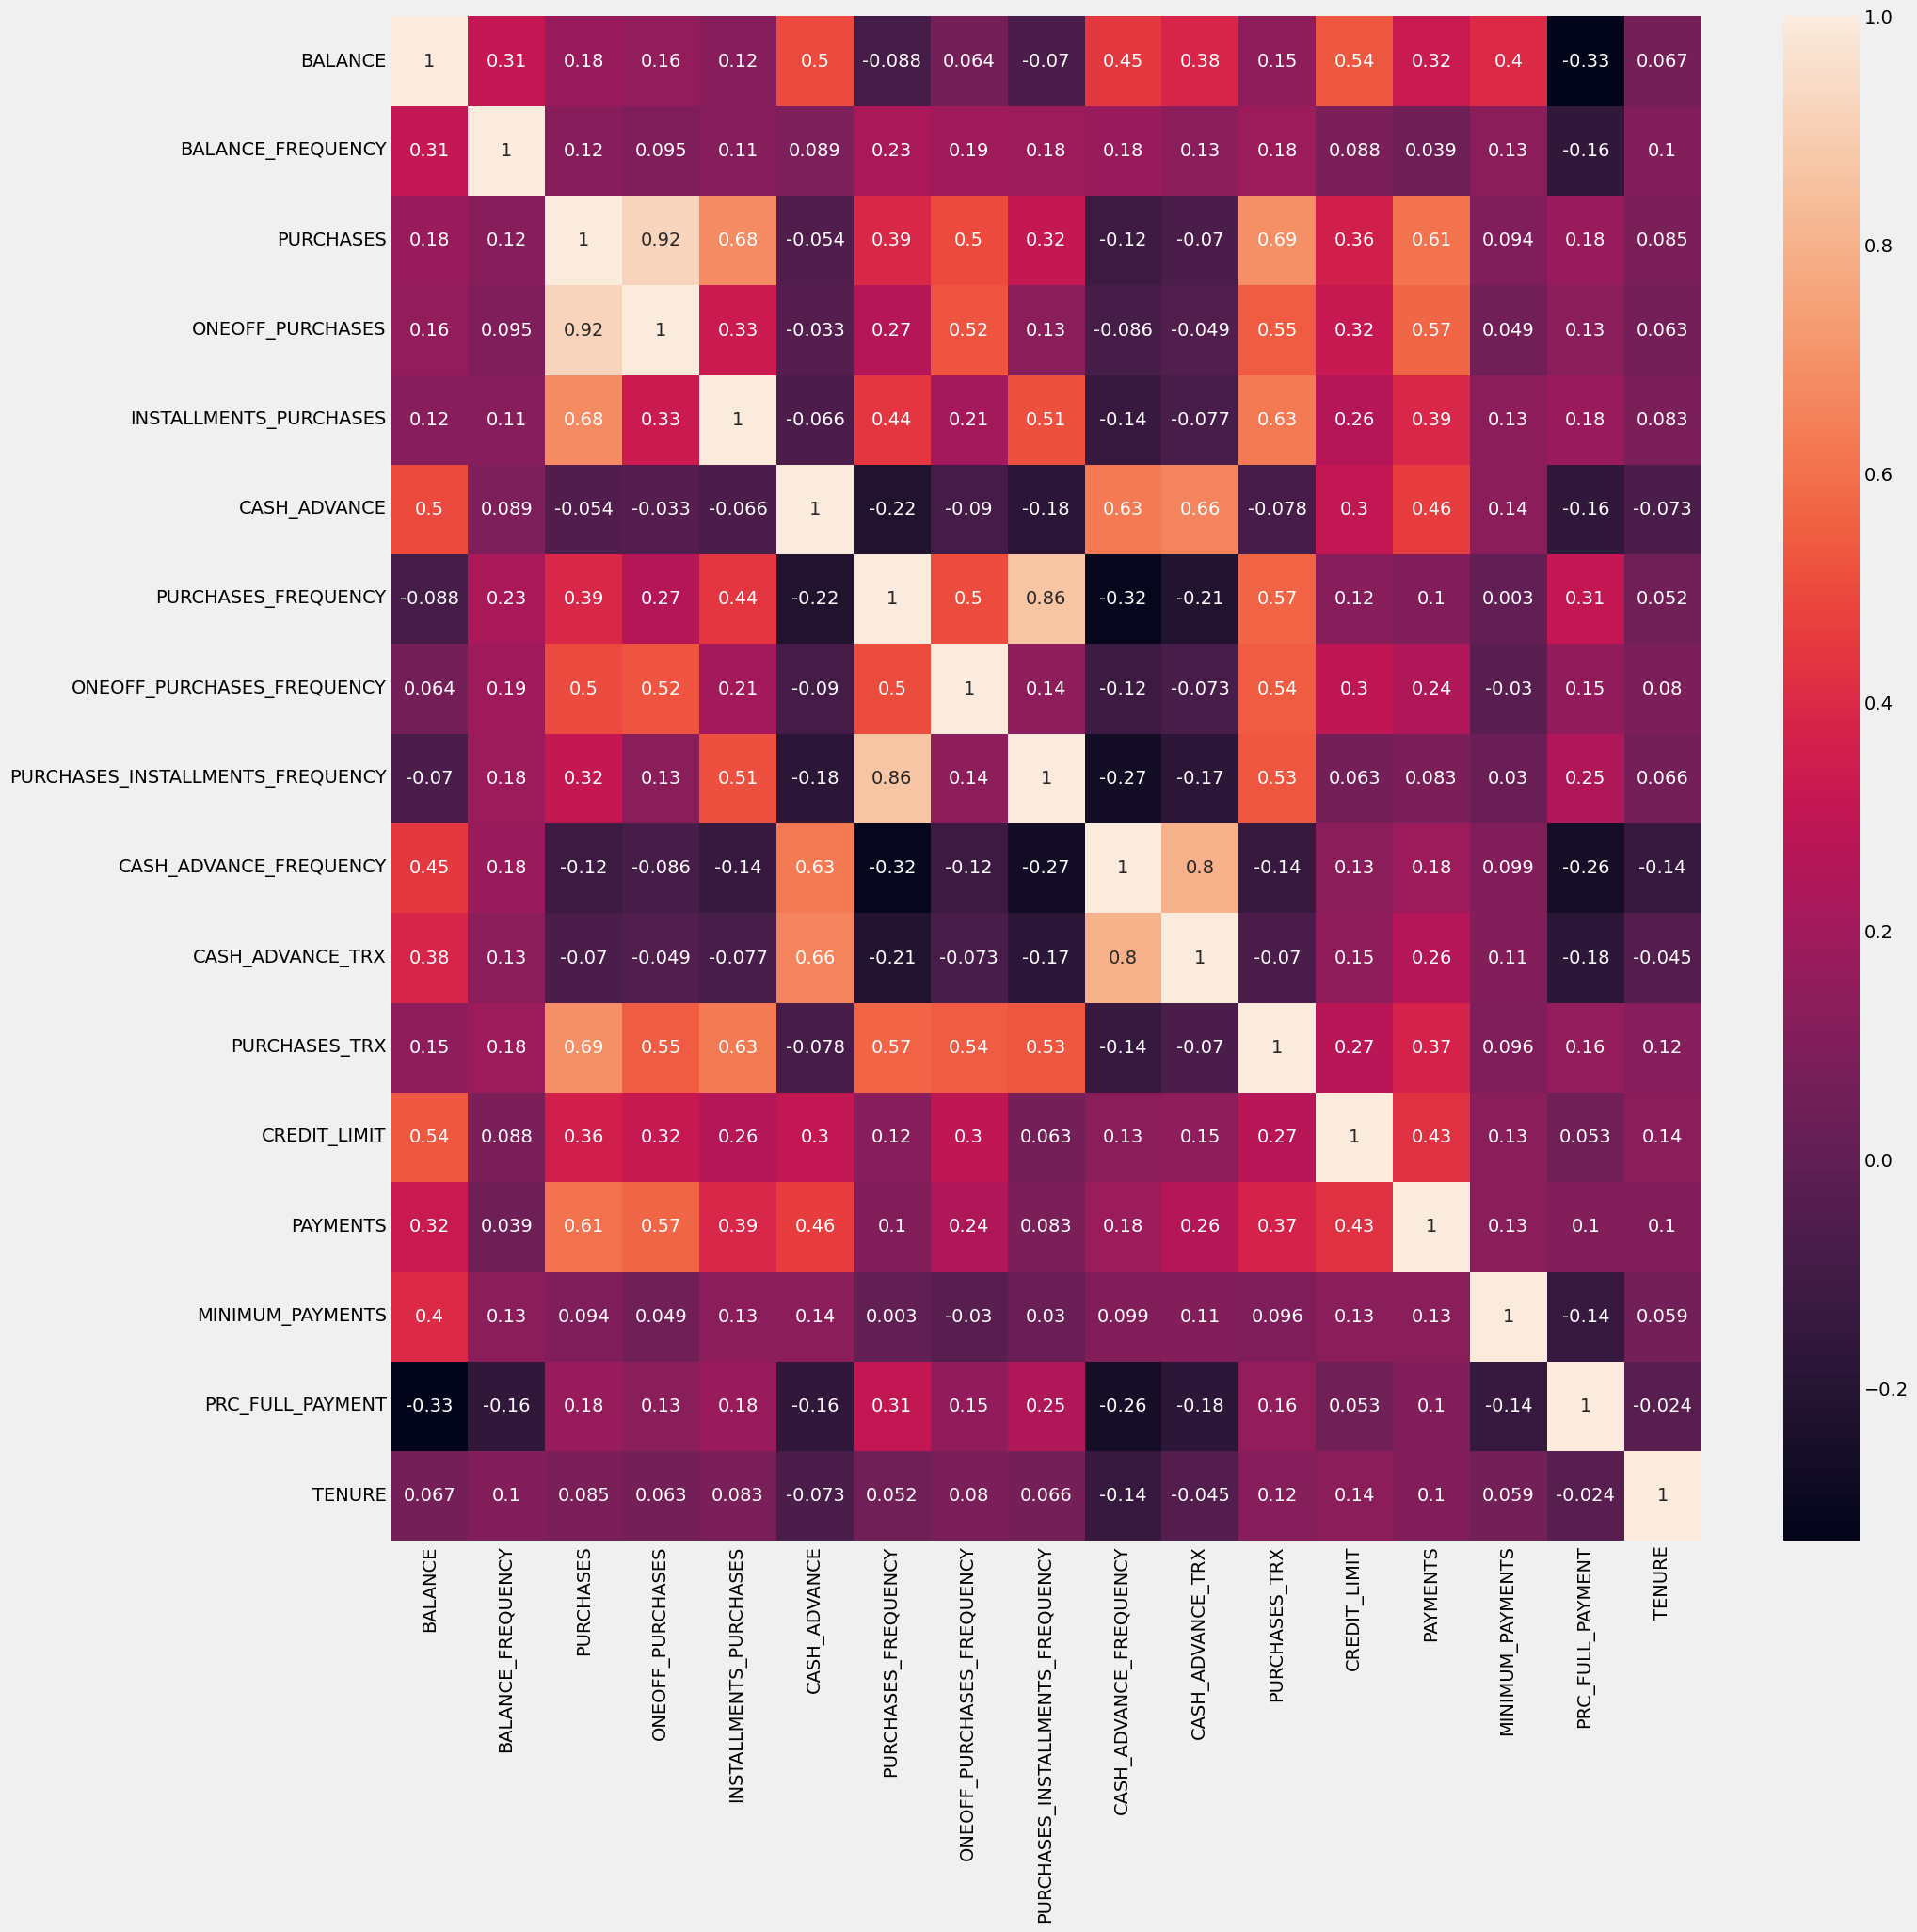

In [78]:
fig , axs=plt.subplots(figsize=(20,20))
sn.heatmap(X.corr(), annot=True)
plt.show()

## K-means clustering

### Feature scaling

In [5]:
scaler=StandardScaler()
X_scaled_array=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled_array, index=X.index, columns=X.columns)


print(X_scaled.mean())
print(X_scaled.std())
X_scaled.head()

BALANCE                            -2.506872e-18
BALANCE_FREQUENCY                  -5.694740e-15
PURCHASES                           4.031476e-16
ONEOFF_PURCHASES                   -5.819743e-15
INSTALLMENTS_PURCHASES              2.643555e-15
CASH_ADVANCE                       -4.485675e-15
PURCHASES_FREQUENCY                -2.187085e-16
ONEOFF_PURCHASES_FREQUENCY         -8.273836e-15
PURCHASES_INSTALLMENTS_FREQUENCY   -2.427835e-15
CASH_ADVANCE_FREQUENCY              1.809023e-15
CASH_ADVANCE_TRX                   -6.369898e-16
PURCHASES_TRX                      -2.611357e-15
CREDIT_LIMIT                        5.480666e-16
PAYMENTS                            5.660389e-17
MINIMUM_PAYMENTS                    1.707309e-16
PRC_FULL_PAYMENT                   -3.689589e-15
TENURE                             -2.976776e-15
dtype: float64
BALANCE                             1.000058
BALANCE_FREQUENCY                   1.000058
PURCHASES                           1.000058
ONEOFF_PURCHASES 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
4,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
5,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


### K-means algorithm

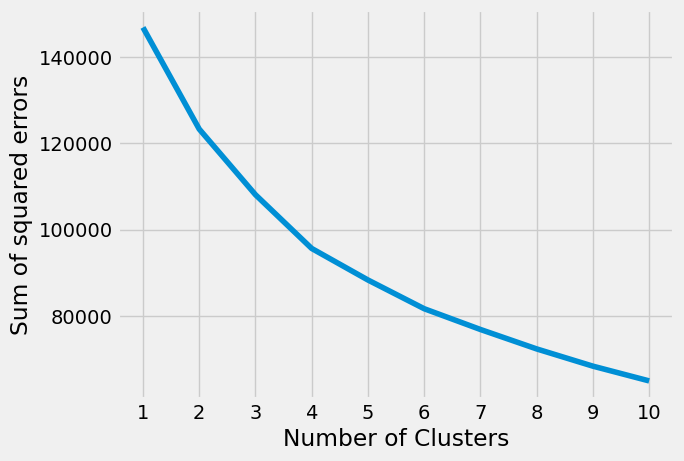

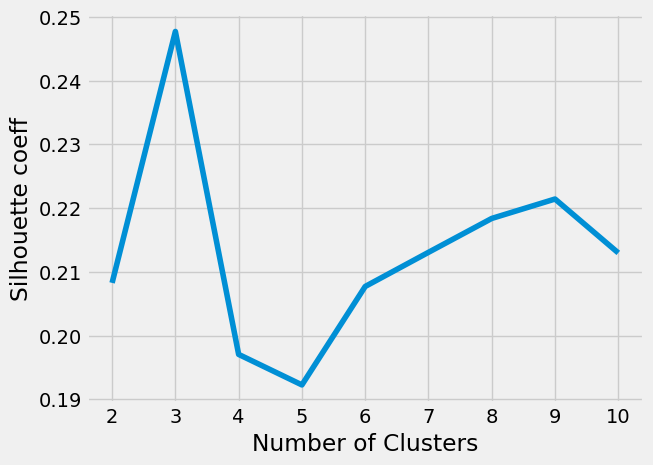

4

In [85]:
inertias=[]
silhouette_coeff = []


for K in range(1,11):
    kmeans=KMeans(
        init="random",
        n_clusters=K,
        n_init=10,
        max_iter=300,
        random_state=42
    )
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    if K>1:
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_coeff.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11),inertias)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of squared errors")
plt.show()

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11),silhouette_coeff)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette coeff")
plt.show()

kl=KneeLocator(range(1,11), inertias, curve="convex", direction="decreasing")
kl.elbow

### Centroids of the market segments

TypeError: inner() got multiple values for argument 'ax'

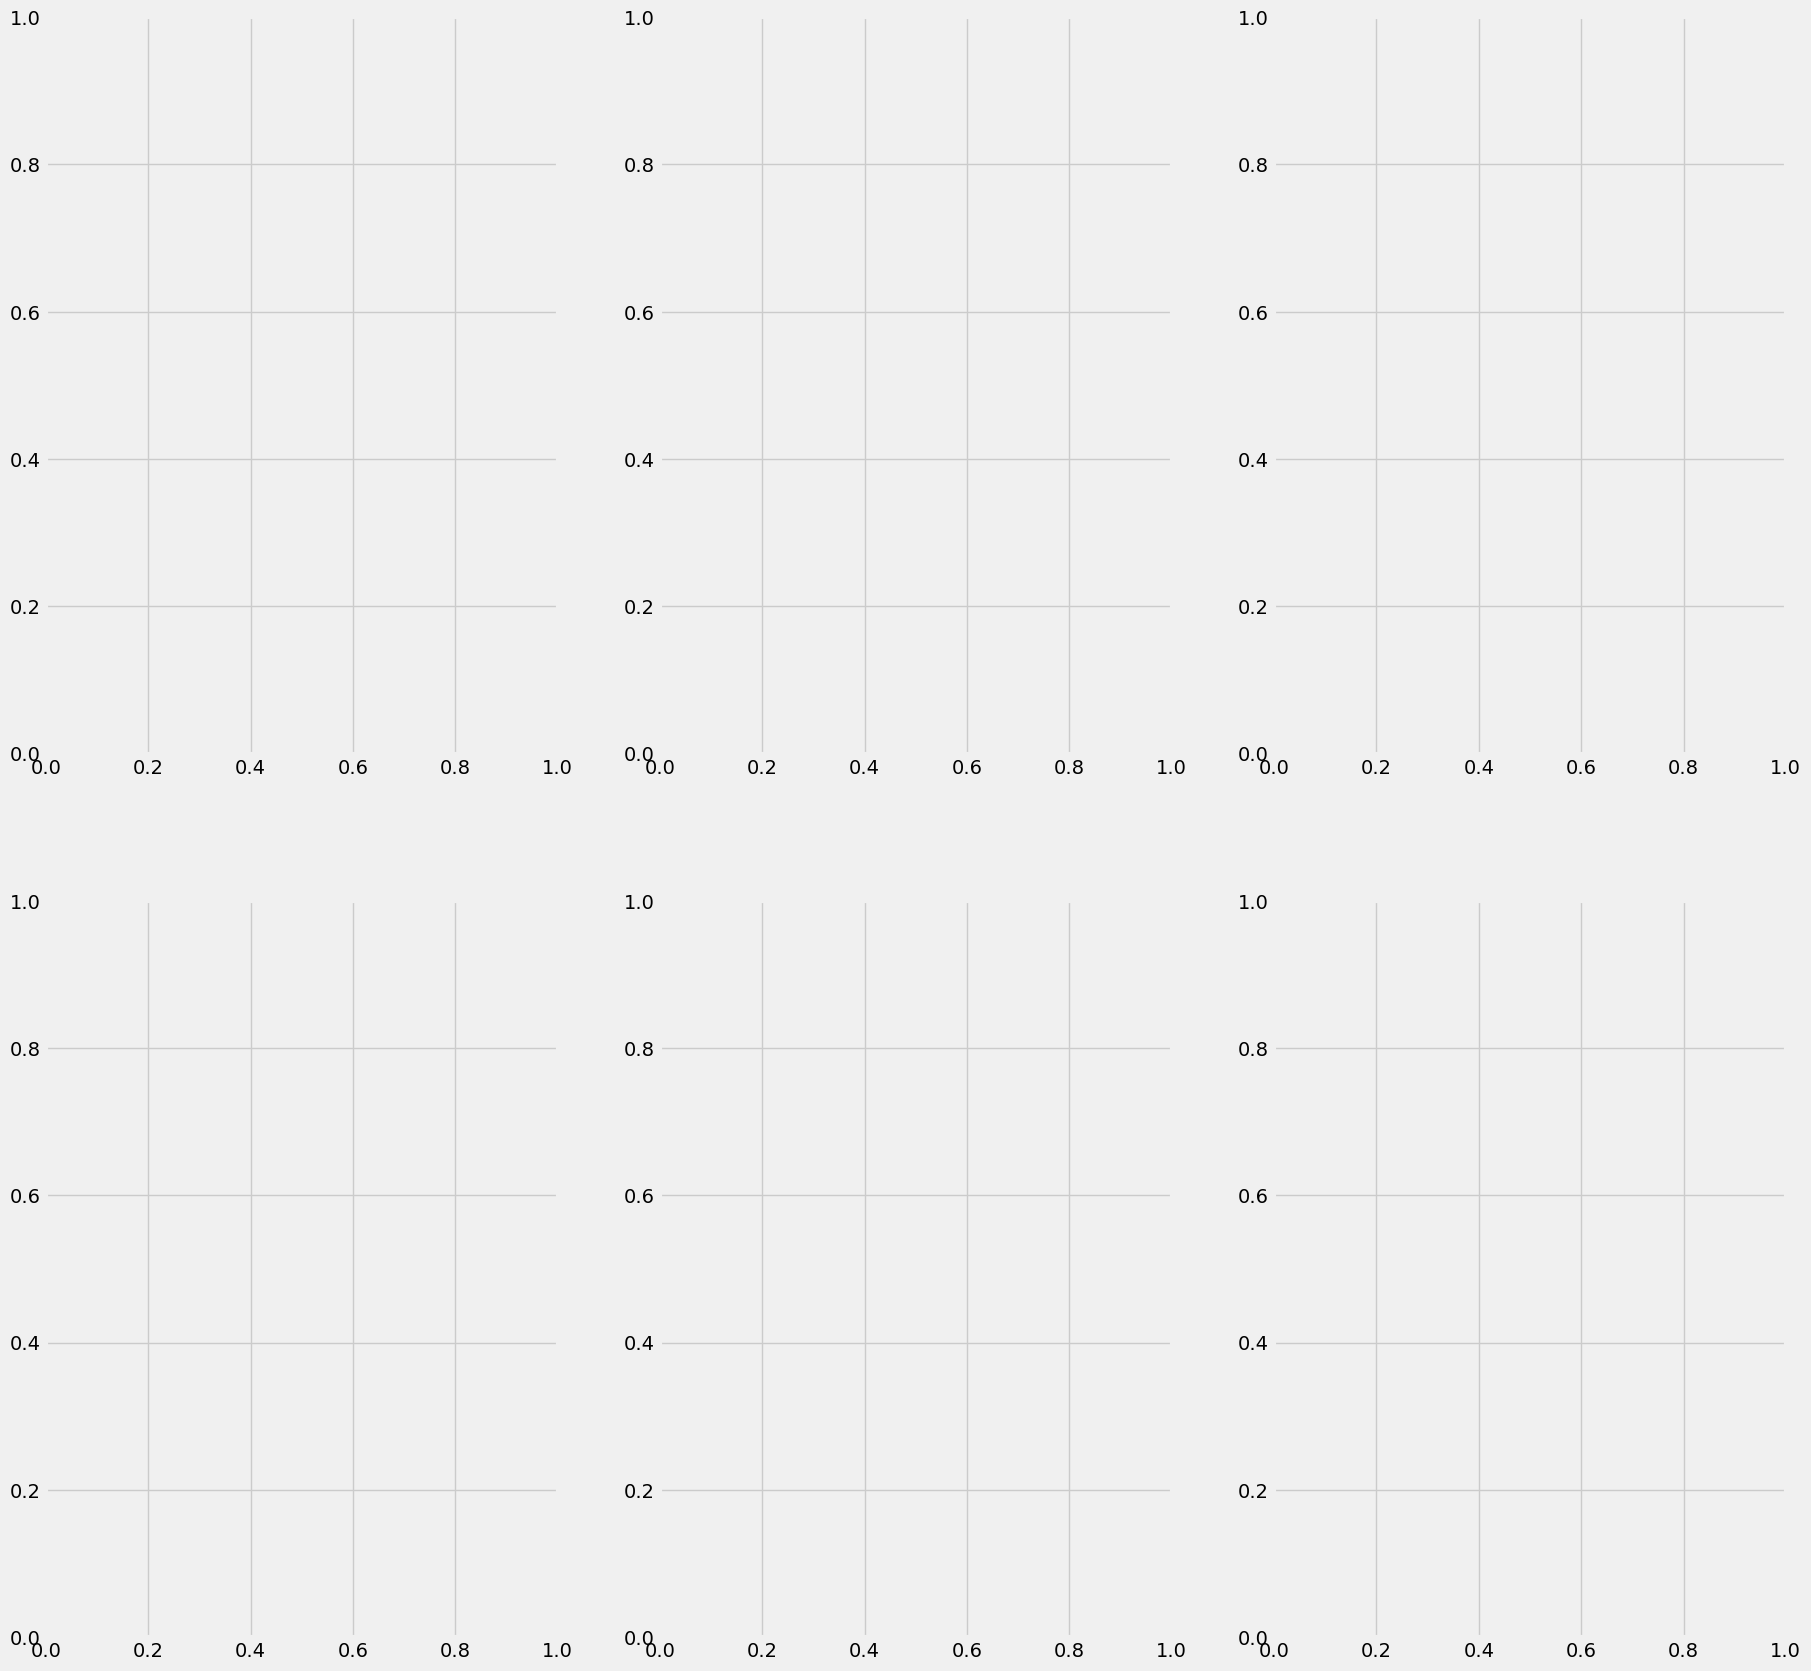

In [24]:
kmeans=KMeans(
        init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42
    )
kmeans.fit(X_scaled)



fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))

y_pos=np.arange(len(attribute_names))
for cluster in range(3):
    
    plt.barh(y_pos, kmeans.cluster_centers_[cluster,:], align='center', alpha=0.5, ax=axs[1,cluster])
    plt.yticks(y_pos, np.array(attribute_names))
    plt.xlabel('Standardised deviation')
    plt.title(f'Cluster no. {cluster}')

    plt.show()
    
y_hat=kmeans.predict(X_scaled)
print(y_hat)

## Gaussian mixtures

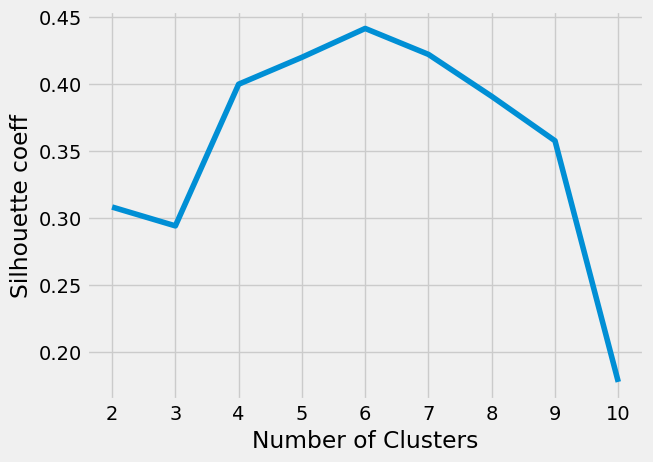

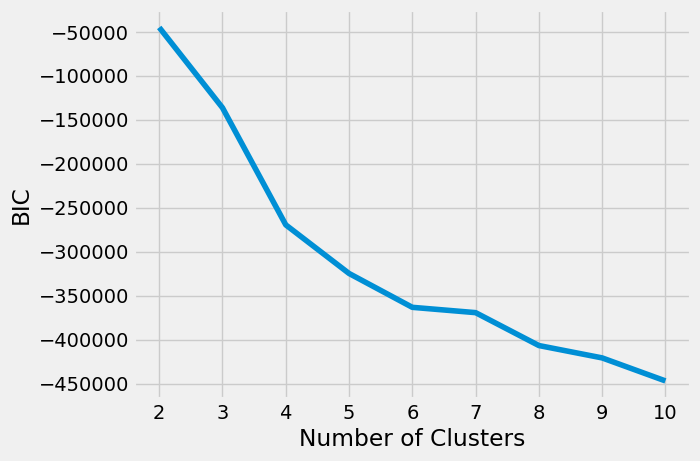

In [18]:
num_components = range(2, 11)

gmm_silhouette_coeff=[]
gmm_bic=[]

for n_components in num_components:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.fit(np.log(X+1))
    gmm_bic.append(gmm.aic(np.log(X+1)))
    score= silhouette_score(np.log(X+1), gmm.predict(np.log(X+1)))
    gmm_silhouette_coeff.append(score)



plt.plot(range(2, 11),gmm_silhouette_coeff)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette coeff")
plt.show()


plt.plot(range(2,11), gmm_bic)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("BIC")
plt.show()

## DBSCAN

In [6]:
from sklearn.cluster import SpectralClustering

sc=SpectralClustering(n_clusters=3)

sc.fit(X_scaled)

print(np.unique(sc.labels_))

KeyboardInterrupt: 